# Practice 2 - Sorting Algorithms II

## Valenzuela Ascencio Gustavo - 117002029 - EDA II - Group: 2 - Semester: 2024-1 - FI UNAM

### Heap Sort

Heap sort is a comparison-based sorting algorithm that uses the heap data structure for finding the maximum number or the minimum number for pushing it into the array until it is sorted.

Heap sort was invented by J. W. J. Williams in 1964, and heap data structure was also invented by him but earlier in that year.

#### Heap

Heap data structure is a binary tree structure that satisfies one of the following conditions:

- For any subtree of the heap, the parent node is greater or equal to the child nodes (MAX HEAP)
- For any subtree of the heap, the parent node is minor or equal to the child nodes (MIN HEAP)

#### Heap sort implementation and analysis (Using RAM model)

In [1]:
#       Worst Case      ||      Average case        ||      Best case

def maxHeap(arr, n): 
    for i in range(n // 2 - 1, -1, -1): #4 * (n/2)
        heapify(arr, n, i) #45 (log n) * (n/2)
        print(arr)
    # maxHeap polyomial: 45 (n log n) + 4 (n/2) = O(n log n)


def heapify(arr, n, i):
    largest = i # 3
    left_child = 2 * i + 1 # 5
    right_child = 2 * i + 2 # 5

    if left_child < n and arr[left_child] > arr[largest]: # 8
        largest = left_child # 3

    if right_child < n and arr[right_child] > arr[largest]: # 8 
        largest = right_child # 3

    # After this we've been completed a subtree transversal, dividing by two the set, making the recursive call
    # logarithmic
    
    if largest != i: # 4
        arr[i], arr[largest] = arr[largest], arr[i]  # 6
        heapify(arr, n, largest)  # Recursive call, we go down the tree until we get to the leaves (log n)
    
    # Heapify polynomial: 45 (log n) = O(log n)

def heapSort(arr):
    n = len(arr) # 4

    maxHeap(arr,n) # 45(n log n) + 4(n/2)

    for i in range(n - 1, 0, -1): # 5(n+1)
        arr[0], arr[i] = arr[i], arr[0]  # 6(n)
        heapify(arr, i, 0)  # 45(log n) * (n)

    # heapSort polyomial: 90 (n log n) + 11(n) + 4(n/2) + 9 = O(n log n)

# Example usage
arr = [12, 11, 13, 5, 6, 7, 10, 15, 90, 117, 95, 80, 77, -100, 0]
heapSort(arr)
print("Sorted array:", arr)


[12, 11, 13, 5, 6, 7, 10, 15, 90, 117, 95, 80, 77, -100, 0]
[12, 11, 13, 5, 6, 80, 10, 15, 90, 117, 95, 7, 77, -100, 0]
[12, 11, 13, 5, 117, 80, 10, 15, 90, 6, 95, 7, 77, -100, 0]
[12, 11, 13, 90, 117, 80, 10, 15, 5, 6, 95, 7, 77, -100, 0]
[12, 11, 80, 90, 117, 77, 10, 15, 5, 6, 95, 7, 13, -100, 0]
[12, 117, 80, 90, 95, 77, 10, 15, 5, 6, 11, 7, 13, -100, 0]
[117, 95, 80, 90, 12, 77, 10, 15, 5, 6, 11, 7, 13, -100, 0]
Sorted array: [-100, 0, 5, 6, 7, 10, 11, 12, 13, 15, 77, 80, 90, 95, 117]


Due to the nature of the heap we can prove that for any case, time complexity will always be n log n, creating the heap takes n log n time no matter the order of the numbers, and is proven that always we will traverse the array in linear time, multiplied by the heapify complexity that is log n, generating n log n complexity.

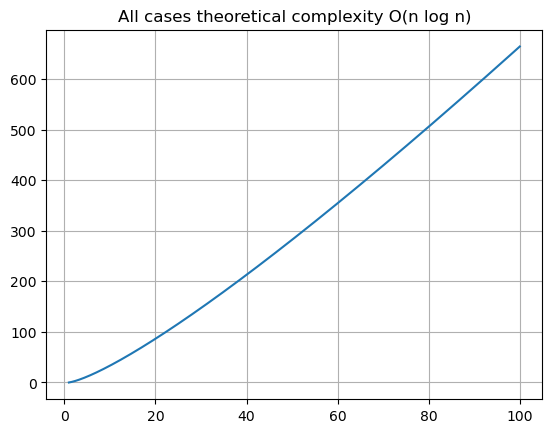

In [2]:
import matplotlib.pyplot as plt
import numpy as np

n_values = np.linspace(1, 100, 1000)  
log_n_values = n_values * np.log2(n_values)  

plt.plot(n_values, log_n_values)

plt.title('All cases theoretical complexity O(n log n)')

plt.grid(True)
plt.show()


Sorted array: [-100, 0, 5, 6, 7, 10, 11, 12, 13, 15, 77, 80, 90, 95, 117]


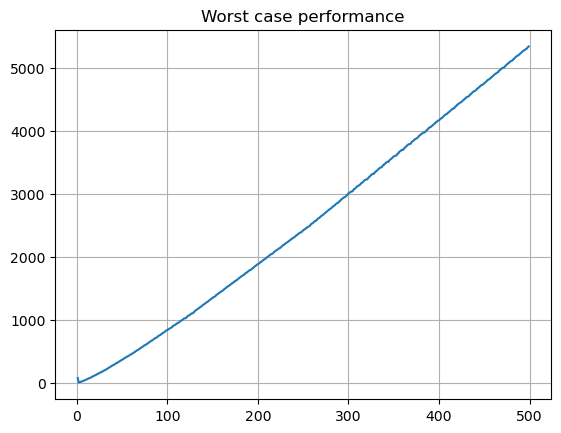

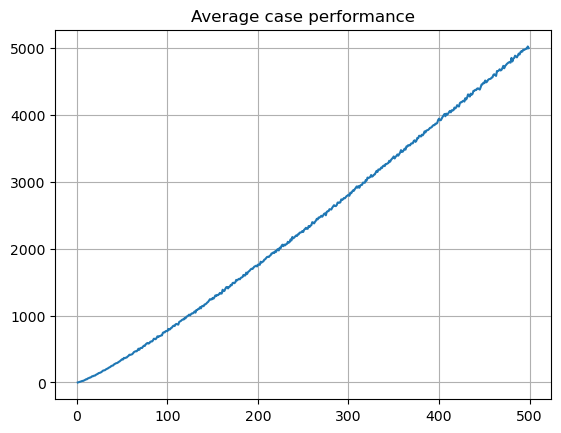

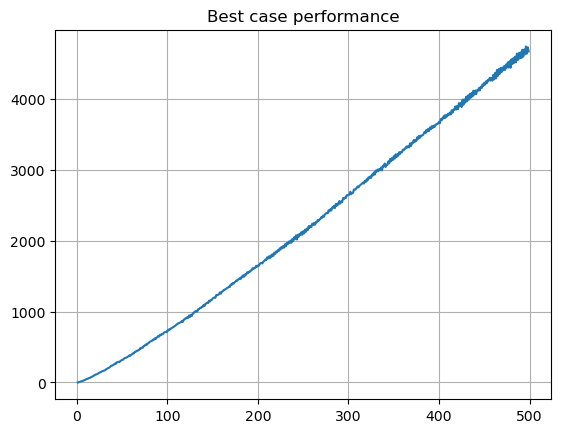

In [3]:
import matplotlib.pyplot as plt
import random
times = 0

def maxHeap(arr, n): 
    global times
    for i in range(n // 2 - 1, -1, -1):
        times += 1
        heapify(arr, n, i)
        
def heapify(arr, n, i):
    global times
    times += 1
    largest = i 
    left_child = 2 * i + 1 
    right_child = 2 * i + 2 

    if left_child < n and arr[left_child] > arr[largest]: 
        largest = left_child 

    if right_child < n and arr[right_child] > arr[largest]: 
        largest = right_child 
    
    if largest != i: 
        arr[i], arr[largest] = arr[largest], arr[i]  
        heapify(arr, n, largest) 

def heapSort(arr):
    global times
    n = len(arr)

    maxHeap(arr,n)

    for i in range(n - 1, 0, -1): 
        times += 1
        arr[0], arr[i] = arr[i], arr[0]  
        heapify(arr, i, 0) 

arr = [12, 11, 13, 5, 6, 7, 10, 15, 90, 117, 95, 80, 77, -100, 0]
heapSort(arr)
print("Sorted array:", arr)

x = []
y = []
for tam in range(1,500):
    l = []
    x.append(tam)
    for value in range(tam):
        l.append(value)
    heapSort(l)
    y.append(times)
    times = 0
        
plt.plot(x,y)
plt.title('Worst case performance')
plt.grid(True)
plt.show()
    
x = []
y = []
for tam in range(1,500):
    l = []
    x.append(tam)
    for value in range(tam):
        l.append(random.randint(-500,500))
    heapSort(l)
    y.append(times)
    times = 0
        
plt.plot(x,y)
plt.title('Average case performance')
plt.grid(True)
plt.show()
    
x = []
y = []
for tam in range(1,500):
    l = []
    x.append(tam)
    for value in range(tam):
        l.append(value)
        l.reverse()
    heapSort(l)
    y.append(times)
    times = 0
        
plt.plot(x,y)
plt.title('Best case performance')
plt.grid(True)
plt.show()

### Quicksort

Quicksort is a comparison based sorting algorithm created by Tony Hoare in 1959 and published in 1961.

Uses a divide and conquer approach, selecting a pivot for partitioning the data into sub-arrays in a recursive way.

### Quicksort implementation using the last element as the pivot

In [4]:
# Function to find the partition position
def partition(array, low, high):

    # Choose the rightmost element as pivot
    pivot = array[high] # 4

    # Pointer for greater element
    i = low - 1 # 5

    for j in range(low, high): # 5 (n+1)
        if array[j] <= pivot: # 5(n)

            i = i + 1 # 5(n) (Gets the greater element)

            (array[i], array[j]) = (array[j], array[i]) # 6(n)

    (array[i + 1], array[high]) = (array[high], array[i + 1]) # 6

    # Return the position from where partition is done
    return i + 1 # 1

    # Partition polynomial: 16n + 21 = O(n)
    # This is the function that decides the partition, is always the same complexity.


def quicksort(array, low, high):
    if low < high: # 4

        pi = partition(array, low, high) # 4 (16n + 21) // This is called in loop recursively by quicksort, so
                                         #              // it is multiplied by the quicksort complexity

        # Recursive call on the left of pivot
        quicksort(array, low, pi - 1) # (n/2) * (16n + 21) || (2 log n) * (16n + 21) || (log n) * (16 + 21)

        # Recursive call on the right of pivot
        quicksort(array, pi + 1, high) # (n/2) * (16n + 21) || (2 log n) * (16n + 21) || (log n) * (16 + 21)

    # Quicksort polynomial (Worst case): 16(n^2) + 37 * 4 (n) + 84
    # Quicksort polynomial (Average case): 16 (n log n) + 64 (n) + 42 (log n) + 84
    # Quicksort polynomial (Best case): 8 (n log n) + 64 (n) + 21 (log n) + 42
    
    
# Driver code
if __name__ == '__main__':
    array = [10, 7, 8, 9, 1, 5, -8, -5, 0, 49]
    N = len(array)

    # Function call
    quicksort(array, 0, N - 1)
    print('Sorted array:')
    for x in array:
        print(x, end=" ")

Sorted array:
-8 -5 0 1 5 7 8 9 10 49 

### Explaniation of the cases.

### - Worst case:

The worst is in which we have an array and in each partition, the element moves only +1 place, making n^2/2 comparisons just like a bubble sort.

### - Average case:

The average case is in which we have an array and in each partition, the element moves approximately 1/4 of n places, dividing the arrays into two but a.size = 1/4 and b.size = 3/4 respectively of the array on each partition

### - Best case:

The best case is in which we have an array and in each partition, the element moves 1/2 of n places, and the length of the array is odd, making it just like merge sort but with the two pointers making faster the process of sorting.

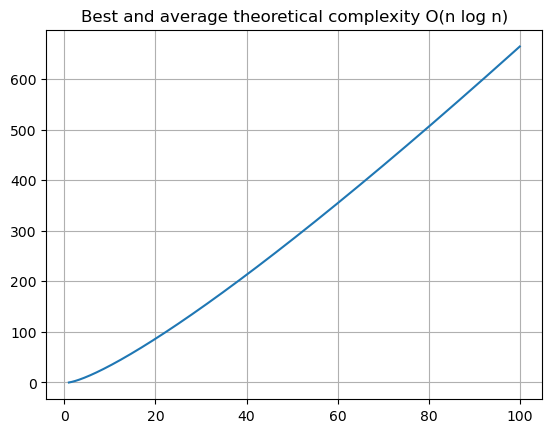

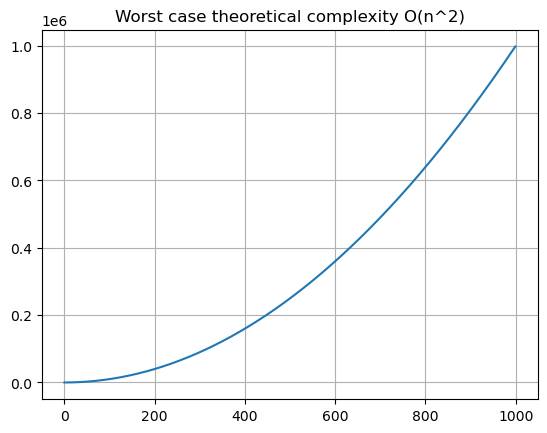

In [5]:
import matplotlib.pyplot as plt
import numpy as np

n_values = np.linspace(1, 100, 1000)  
log_n_values = n_values * np.log2(n_values)  

plt.plot(n_values, log_n_values)

plt.title('Best and average theoretical complexity O(n log n)')

plt.grid(True)
plt.show()

n = np.arange(0, 1000) 

n_squared = n**2

plt.plot(n, n_squared)

plt.title('Worst case theoretical complexity O(n^2)')

plt.grid(True)
plt.show()


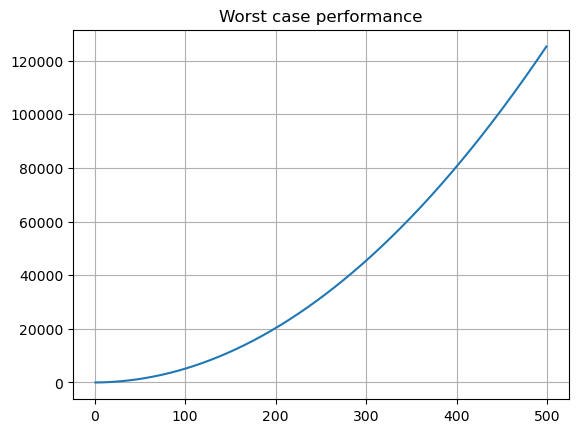

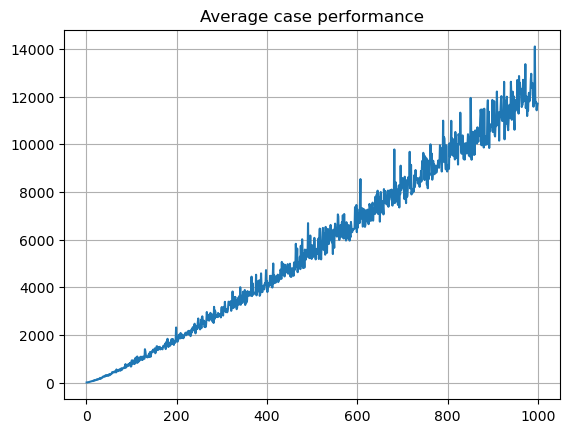

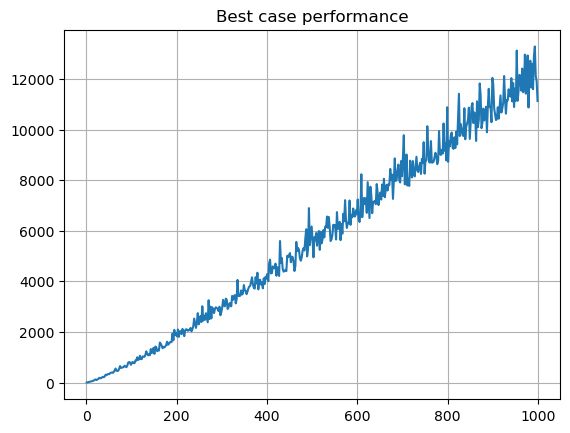

In [6]:
import matplotlib.pyplot as plt
import random
times = 0

def partition(array, low, high):
    global times
    pivot = array[high]
    i = low - 1 

    for j in range(low, high):
        times += 1
        if array[j] <= pivot: 
            i = i + 1
            (array[i], array[j]) = (array[j], array[i]) 
    (array[i + 1], array[high]) = (array[high], array[i + 1]) 

    return i + 1

def quicksort(array, low, high):
    global times
    times += 1
    if low < high: 
        pi = partition(array, low, high) 
        quicksort(array, low, pi - 1)
        quicksort(array, pi + 1, high) 

x = []
y = []
for tam in range(1,500):
    l = []
    x.append(tam)
    for value in range(tam):
        l.append(value)
    quicksort(l,0,tam-1)
    y.append(times)
    times = 0
        
plt.plot(x,y)
plt.title('Worst case performance')
plt.grid(True)
plt.show()
    
x = []
y = []
for tam in range(1,1000):
    l = []
    x.append(tam)
    for value in range(tam):
        l.append(random.randint(-500,500))
    quicksort(l,0,tam-1)
    y.append(times)
    times = 0
        
plt.plot(x,y)
plt.title('Average case performance')
plt.grid(True)
plt.show()
    
x = []
y = []
for tam in range(1,1000,+2):
    l = []
    x.append(tam)
    count = 1
    num = 0
    for value in range(tam):
        l.append(random.randint(-500,500))
    mid = tam // 2
    l[mid], l[tam - 1] = l[tam - 1], l[mid]
    #for i in range(tam - mid):
        #l[i] = mid + i
    #print(l)
    quicksort(l,0,tam-1)
    y.append(times)
    times = 0
        
plt.plot(x,y)
plt.title('Best case performance')
plt.grid(True)
plt.show()